In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df[data.target_names[0]] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=[data.target_names[0]]),df[data.target_names[0]],test_size=.2,random_state=42)

In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=.1,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
r2_score(y_test,y_pred)

0.8110127626985352

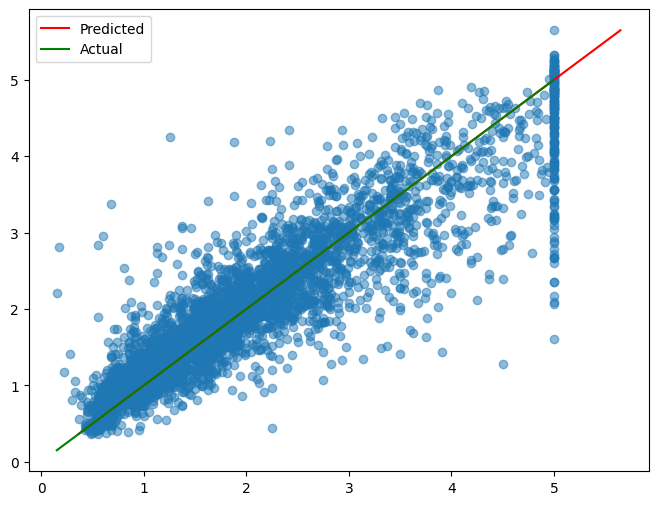

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=.5)
plt.plot([y_pred.min(),y_pred.max()],[y_pred.min(),y_pred.max()],color='r',label='Predicted')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='g',label='Actual')
plt.legend()
plt.show()

In [ ]:
lr = [x/10 for x in range(0,21)]
r2 = []
for i in lr:
    model = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=i,
        random_state=42,
        max_depth=3
    )
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))

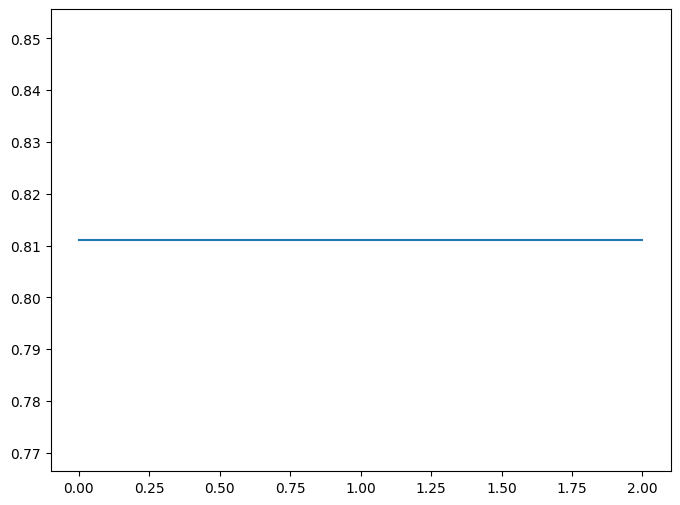

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(lr,r2)
plt.show()

In [ ]:
depth = [1,2,3,4,5]
r2 = []
for i in depth:
    model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=.1,
        random_state=42,
        max_depth=i
    )
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))

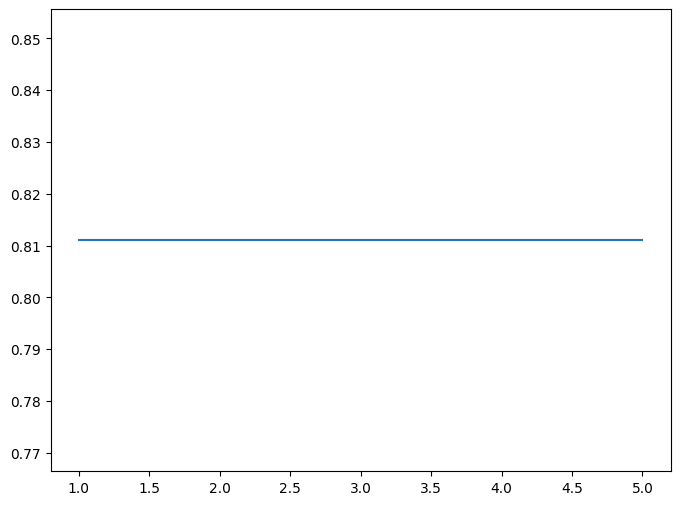

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(depth,r2)
plt.show()

In [ ]:
lr = LinearRegression()
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
r2_score(y_test,y_pred)

0.6456819728455382

In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    max_depth=None,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
r2_score(y_test,y_pred)

0.8411549555578922

In [ ]:
xgb.feature_importances_

array([0.44216314, 0.06442954, 0.08266754, 0.03478385, 0.02192709,
       0.12941411, 0.10798968, 0.116625  ], dtype=float32)